## Import packages

In [1]:
#import packages here
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import json
import glob
from datetime import datetime

%matplotlib notebook

## Loading and exploring a single data file

In [22]:
data_path = '/home/godwin/Desktop/dataMinded/inter_project/messages'

# Opening JSON file
with open(data_path+"/0b8b6084-b29b-4235-895f-7046925ec17e.txt") as f:
    #print(type(f))
    # returns JSON object as 
    # a dictionary
    data = json.load(f)


#data

In [3]:
data.keys()

dict_keys(['Type', 'MessageId', 'TopicArn', 'Message', 'Timestamp', 'SignatureVersion', 'Signature', 'SigningCertURL', 'UnsubscribeURL', 'MessageAttributes'])

In [4]:
data_mes = json.loads(data["Message"])
data_mes

{'date': {'utc': '2023-04-21T11:00:00.000Z',
  'local': '2023-04-21T13:00:00+02:00'},
 'parameter': 'no2',
 'value': 7,
 'unit': 'µg/m³',
 'averagingPeriod': {'unit': 'hours', 'value': 1},
 'location': 'BETE714',
 'city': 'West-Vlaanderen',
 'country': 'BE',
 'coordinates': {'latitude': 51.2789633039539, 'longitude': 3.2486240629412},
 'attribution': [{'name': 'EEA',
   'url': 'http://www.eea.europa.eu/themes/air/air-quality'}],
 'sourceName': 'EEA Belgium',
 'sourceType': 'government',
 'mobile': False}

In [5]:
#Extract date of measurement
data_local_date = data_mes['date'].get('local')
print(data_local_date)

#Extract value of measurement
data_value = data_mes.get('value')
print(data_value)

#Extract parameter
data_parameter = data_mes.get('parameter')
print(data_parameter)

#Extract city
data_city = data_mes.get('city')
print(data_city)

#Extract country
data_country = data_mes.get('country')
print(data_country)

#Extract sourcetype
data_sourceType = data_mes.get('sourceType')
print(data_sourceType)

#Extract mobility
data_mobility = data_mes.get('mobile')
print(data_mobility)

#Extract location
data_loc = data_mes.get('location')
print(data_loc)

#Extract unit
data_unit = data_mes.get('unit')
print(data_unit)

2023-04-21T13:00:00+02:00
7
no2
West-Vlaanderen
BE
government
False
BETE714
µg/m³


## Loading the relevant measurement parameters from several files

In [6]:
def data_from_all_measurements(city:str)->dict:
    
    """combines individual measurements from different files into a single dictionaary and returns the dict.
    it accepts city name as an argument which has to be a string
    """
    
    new_data = {}

    new_data['local date'] = []

    new_data['value'] = []

    new_data['parameter'] = []

    new_data['city'] = []

    new_data['country'] = []

    new_data['sourceType'] = []

    new_data['mobile'] = []

    new_data['location'] = []

    new_data['unit'] = []

    for i, file in enumerate(glob.glob('/home/godwin/Desktop/dataMinded/inter_project/message_unique/*')):

        with open(str(file)) as f:

            data = json.load(f)

        data_mes = json.loads(data["Message"])

        if data_mes.get('city') != f'{city}':

            continue

        #print(i, file, data_mes['date'].get('local'))

        new_data['local date'].append(data_mes['date'].get('local'))

        new_data['value'].append(data_mes.get('value'))

        new_data['parameter'].append(data_mes.get('parameter'))

        new_data['city'].append(data_mes.get('city'))

        new_data['country'].append(data_mes.get('country'))

        new_data['sourceType'].append(data_mes.get('sourceType'))

        new_data['mobile'].append(data_mes.get('mobile'))

        new_data['location'].append(data_mes.get('location'))

        new_data['unit'].append(data_mes.get('unit'))
        
    return new_data
    

new_data = data_from_all_measurements("West-Vlaanderen")

#pd.DataFrame.from_dict(new_data)

## Visualising Data

<IPython.core.display.Javascript object>


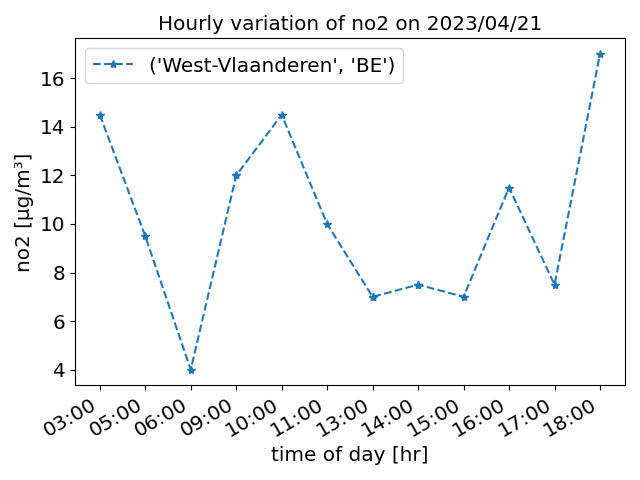

In [21]:
def visualize_data(new_data:dict):
    
    dt = np.array([datetime.fromisoformat(d).strftime("%H:%M") for d in new_data.get('local date')])

    dv = np.array(new_data.get('value'))

    #ordering/sorting unordered dataset
    index_sort = np.argsort([datetime.fromisoformat(d).strftime("%H:%M") for d in new_data.get('local date')])

    dt = dt[index_sort]

    dv = dv[index_sort]

    #print(index_sort, dt, dv)

    plt.figure()
    plt.plot(dt, dv, ls='--', marker='*', )
    plt.xlabel("time of day [hr]", fontsize='x-large')
    plt.xticks(fontsize='x-large')
    plt.yticks(fontsize='x-large')
    plt.ylabel(f"{new_data.get('parameter')[0]} [{new_data.get('unit')[0]}]", fontsize='x-large')
    plt.legend([f"{new_data.get('city')[0], new_data.get('country')[0]}"], fontsize='x-large')
    day = datetime.fromisoformat(new_data.get('local date')[0]).strftime('%Y/%m/%d')
    plt.title(f"Hourly variation of {new_data.get('parameter')[0]} on {day}", fontsize='x-large')
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.show()
    
    
visualize_data(new_data)